In [114]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('raw_dataset.csv')

C:\Users\ngova\AppData\Local\Temp\ipykernel_12428\1635338934.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_dataset.csv')


In [116]:
df.drop(['ID', 'Name', 'SSN', 'Month'], axis=1, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [118]:
df.select_dtypes('O').info()
df.select_dtypes('O').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_ID              100000 non-null  object
 1   Age                      100000 non-null  object
 2   Occupation               100000 non-null  object
 3   Annual_Income            100000 non-null  object
 4   Num_of_Loan              100000 non-null  object
 5   Type_of_Loan             88592 non-null   object
 6   Num_of_Delayed_Payment   92998 non-null   object
 7   Changed_Credit_Limit     100000 non-null  object
 8   Credit_Mix               100000 non-null  object
 9   Outstanding_Debt         100000 non-null  object
 10  Credit_History_Age       90970 non-null   object
 11  Payment_of_Min_Amount    100000 non-null  object
 12  Amount_invested_monthly  95521 non-null   object
 13  Payment_Behaviour        100000 non-null  object
 14  Monthly_Balance      

,Customer_ID,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [119]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace([''], np.NaN)
df['Age'] = df.Age.astype(int)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [120]:
def month_text_to_number(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        return (num1*12)+num2
    else:
        return x
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: month_text_to_number(x)).astype(float)

In [121]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer_ID            100000 non-null  object
 1   Occupation             92938 non-null   object
 2   Type_of_Loan           88592 non-null   object
 3   Credit_Mix             79805 non-null   object
 4   Payment_of_Min_Amount  100000 non-null  object
 5   Payment_Behaviour      100000 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [122]:
df['Occupation'].value_counts(dropna=False)

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [123]:
df['Credit_Mix'].value_counts(dropna=False)

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [124]:
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [125]:
df['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [126]:
df['Credit_Score'].value_counts(dropna=False)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [127]:
df['Occupation'] = df.Occupation.apply(lambda x: 'Unknown' if pd.isnull(x) else x)
df['Credit_Mix'] = df.Credit_Mix.apply(lambda x: 'Unknown' if pd.isnull(x) else x)
df['Payment_of_Min_Amount'] = df.Payment_of_Min_Amount.apply(lambda x: 'Unknown' if x == 'NM' else x)
df['Payment_Behaviour'] = df.Payment_Behaviour.apply(lambda x: 'Unknown' if x == '!@9#%8' else x)

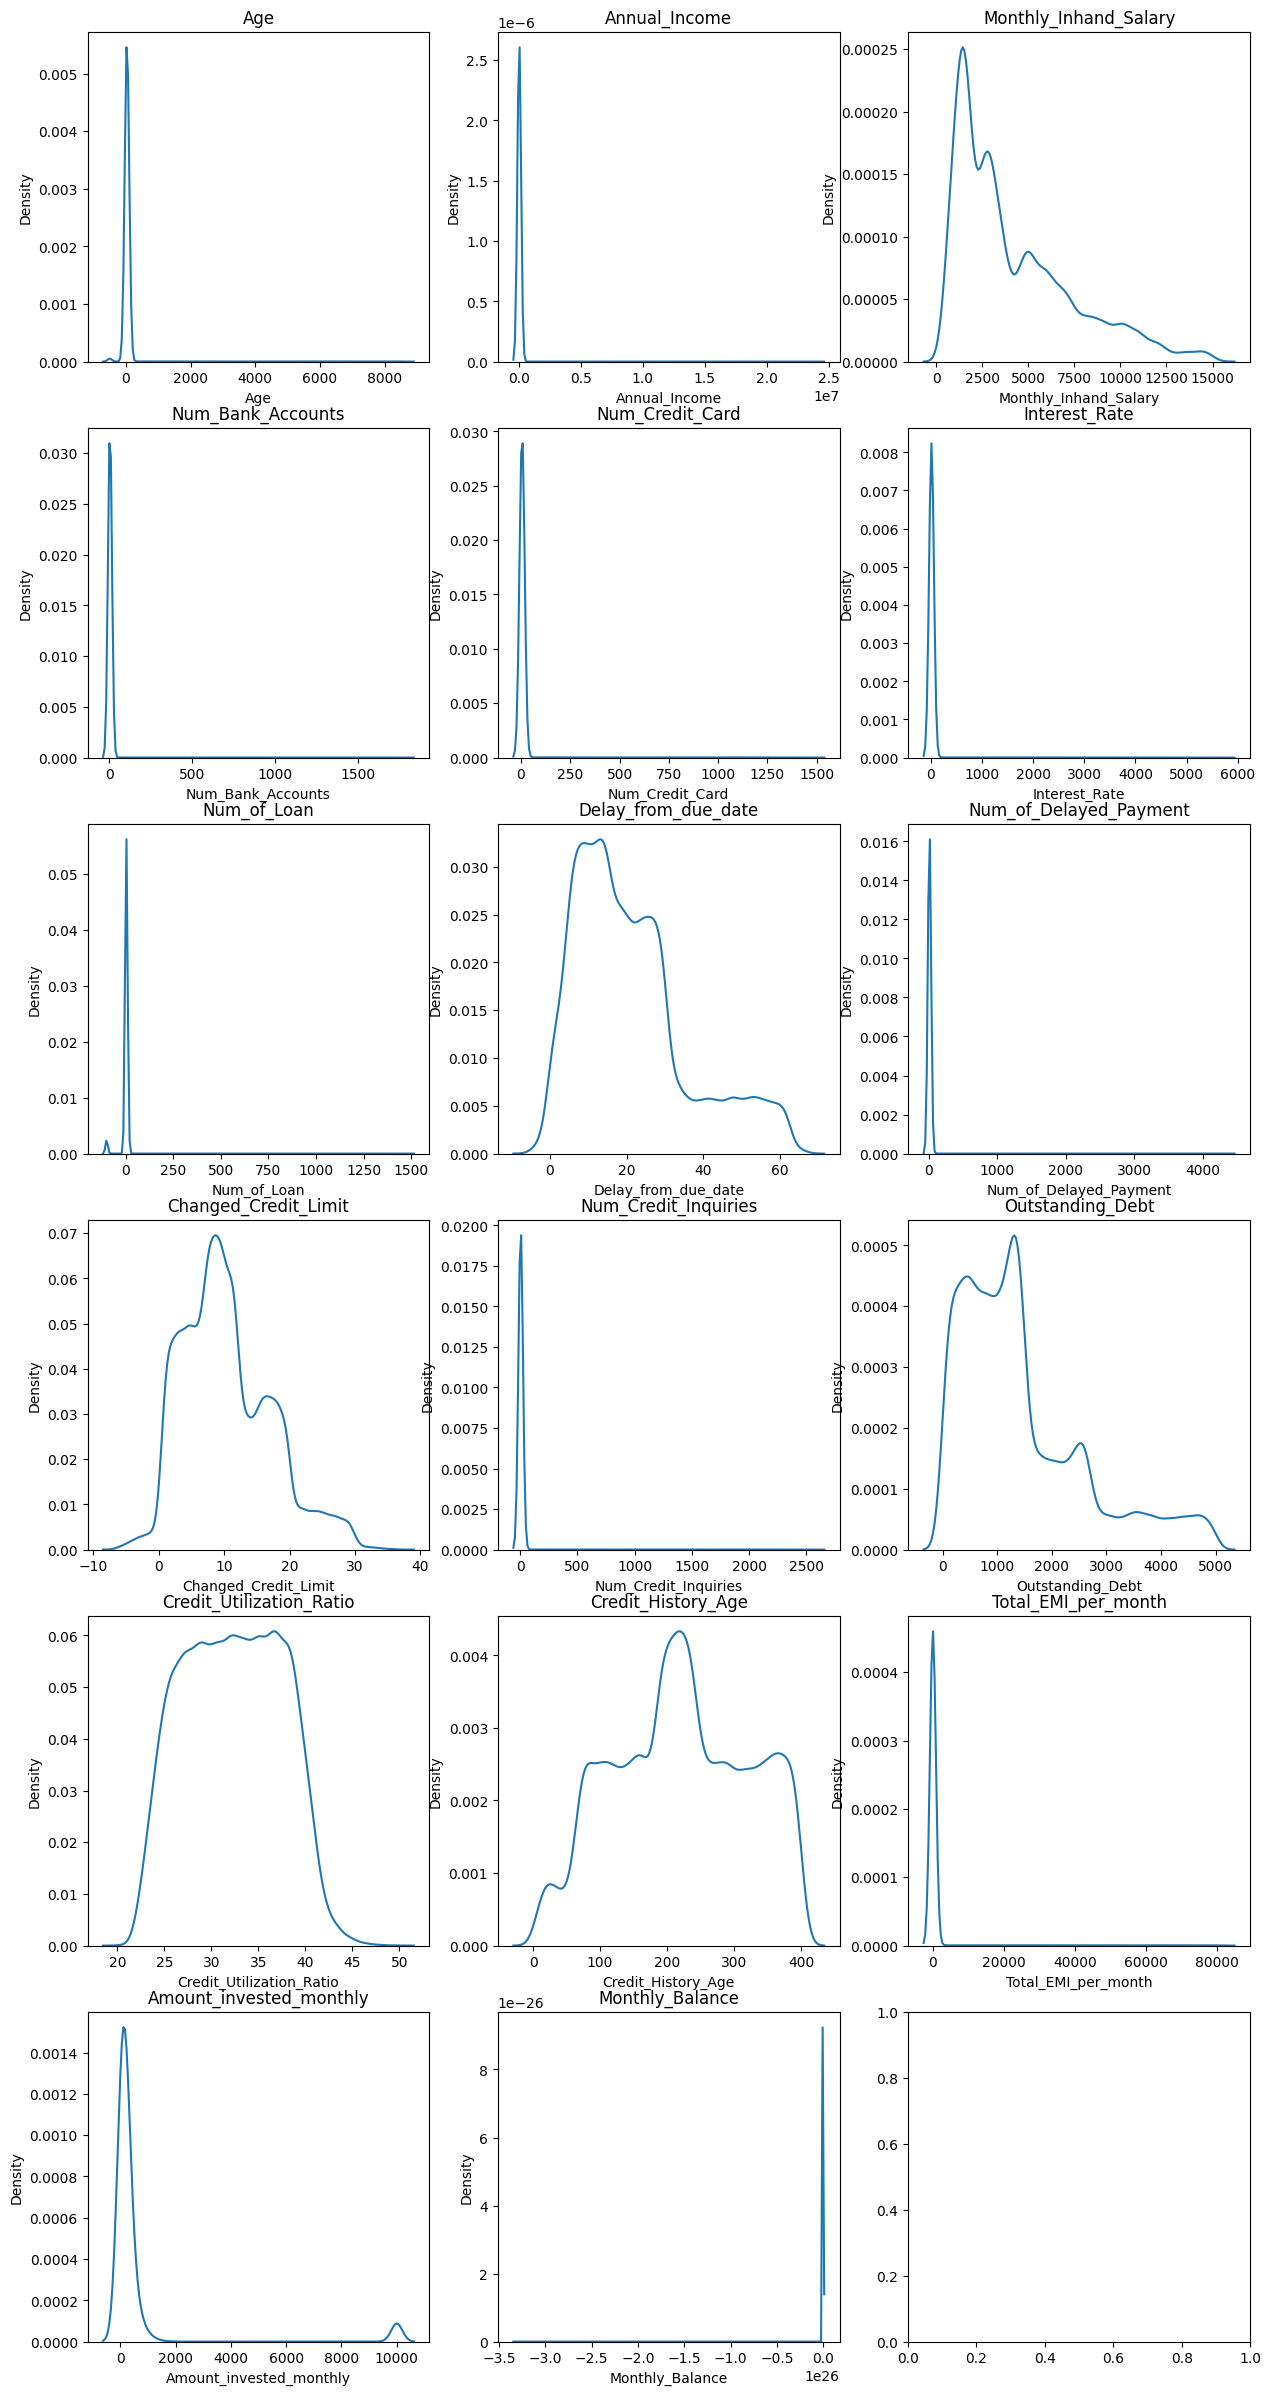

In [128]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
for i, col in enumerate(df.select_dtypes(exclude='O').columns):
    ax[i//3][i%3].set_title(col)
    sns.kdeplot(df, x=col, ax=ax[i//3][i%3])

In [129]:
print(df.select_dtypes(exclude='O').describe())

                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      110.649700   1.764157e+05            4194.170850          17.091280   
std       686.244717   1.429618e+06            3183.686167         117.404834   
min      -500.000000   7.005930e+03             303.645417          -1.000000   
25%        24.000000   1.945750e+04            1625.568229           3.000000   
50%        33.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040       3.009960            21.068780   
std          129.05741     466.422621  

In [130]:
def data_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5

    return lower, upper

In [131]:
lower, upper = data_outlier(df, "Age")
print(lower, upper)

-3.0 69.0


Age: có một số dữ liệu bất thường (< 0, >> 100), interquartile nằm trong khoảng -3 đến 69

In [132]:
lower = 0
df["Age"] = df["Age"].map(lambda x: np.NaN if x > upper or x < lower else x)

In [133]:
df.Age.describe()

count    97219.000000
mean        33.320009
std         10.769558
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [134]:
lower, upper = data_outlier(df, "Num_Bank_Accounts")
print(lower, upper)

-3.0 13.0


In [135]:
lower = 0
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].map(lambda x: np.NaN if x > upper or x < lower else x)

In [136]:
df.Num_Bank_Accounts.describe()

count    98664.000000
mean         5.368980
std          2.592451
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64

In [137]:
lower, upper = data_outlier(df, "Num_Credit_Card")
print(lower, upper)

-0.5 11.5


In [138]:
lower = 0
df["Num_Credit_Card"] = df["Num_Credit_Card"].map(lambda x: np.NaN if x > upper or x < lower else x)

In [139]:
df.Num_Credit_Card.describe()

count    97729.000000
mean         5.533322
std          2.067703
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [140]:
lower, upper = data_outlier(df, "Interest_Rate")
print(lower, upper)
df["Interest_Rate"] = df["Interest_Rate"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Interest_Rate.describe()

-10.0 38.0


count    97966.000000
mean        14.531603
std          8.739748
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [141]:
lower, upper = data_outlier(df, "Delay_from_due_date")
print(lower, upper)

-17.0 55.0


In [142]:
lower = 0
df["Delay_from_due_date"] = df["Delay_from_due_date"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Delay_from_due_date.describe()

count    95407.000000
mean        19.609326
std         12.821952
min          0.000000
25%         10.000000
50%         17.000000
75%         27.000000
max         55.000000
Name: Delay_from_due_date, dtype: float64

In [143]:
lower, upper = data_outlier(df, "Num_of_Delayed_Payment")
print(lower, upper)

-4.5 31.5


In [144]:
lower = 0
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Num_of_Delayed_Payment.describe()

count    91618.000000
mean        13.419634
std          6.207354
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [163]:
lower, upper = data_outlier(df, "Amount_invested_monthly")
df["Amount_invested_monthly"][df["Amount_invested_monthly"] > upper].info()

<class 'pandas.core.series.Series'>
Int64Index: 9842 entries, 18 to 99973
Series name: Amount_invested_monthly
Non-Null Count  Dtype  
--------------  -----  
9842 non-null   float64
dtypes: float64(1)
memory usage: 153.8 KB


In [145]:
lower, upper = data_outlier(df, "Num_Credit_Inquiries")
print(lower, upper)
lower = 0
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Num_Credit_Inquiries.describe()

-6.0 18.0


count    96385.000000
mean         5.781117
std          3.860712
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64

In [146]:
lower, upper = data_outlier(df, "Annual_Income")
print(lower, upper)
lower = 0
df["Annual_Income"] = df["Annual_Income"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Annual_Income.describe()

-60542.630000000005 152791.05


count     97217.000000
mean      48346.570874
std       35153.548751
min        7005.930000
25%       19205.485000
50%       36403.980000
75%       69788.080000
max      152574.760000
Name: Annual_Income, dtype: float64

In [147]:
lower, upper = data_outlier(df, "Total_EMI_per_month")
print(lower, upper)
lower = 0
df["Total_EMI_per_month"] = df["Total_EMI_per_month"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Total_EMI_per_month.describe()

-166.06972242783047 357.60063203221614


count    93205.000000
mean        89.861141
std         82.779840
min          0.000000
25%         28.012865
50%         63.322644
75%        132.865336
max        357.406068
Name: Total_EMI_per_month, dtype: float64

In [148]:
lower, upper = data_outlier(df, "Monthly_Balance")
print(lower, upper)
lower = 0
df["Monthly_Balance"] = df["Monthly_Balance"].map(lambda x: np.NaN if x > upper or x < lower else x)
df.Monthly_Balance.describe()

-30.099756802980778 770.4121521211072


count    91164.000000
mean       356.368169
std        141.465349
min          0.007760
25%        265.408058
50%        324.773104
75%        426.878751
max        770.412022
Name: Monthly_Balance, dtype: float64

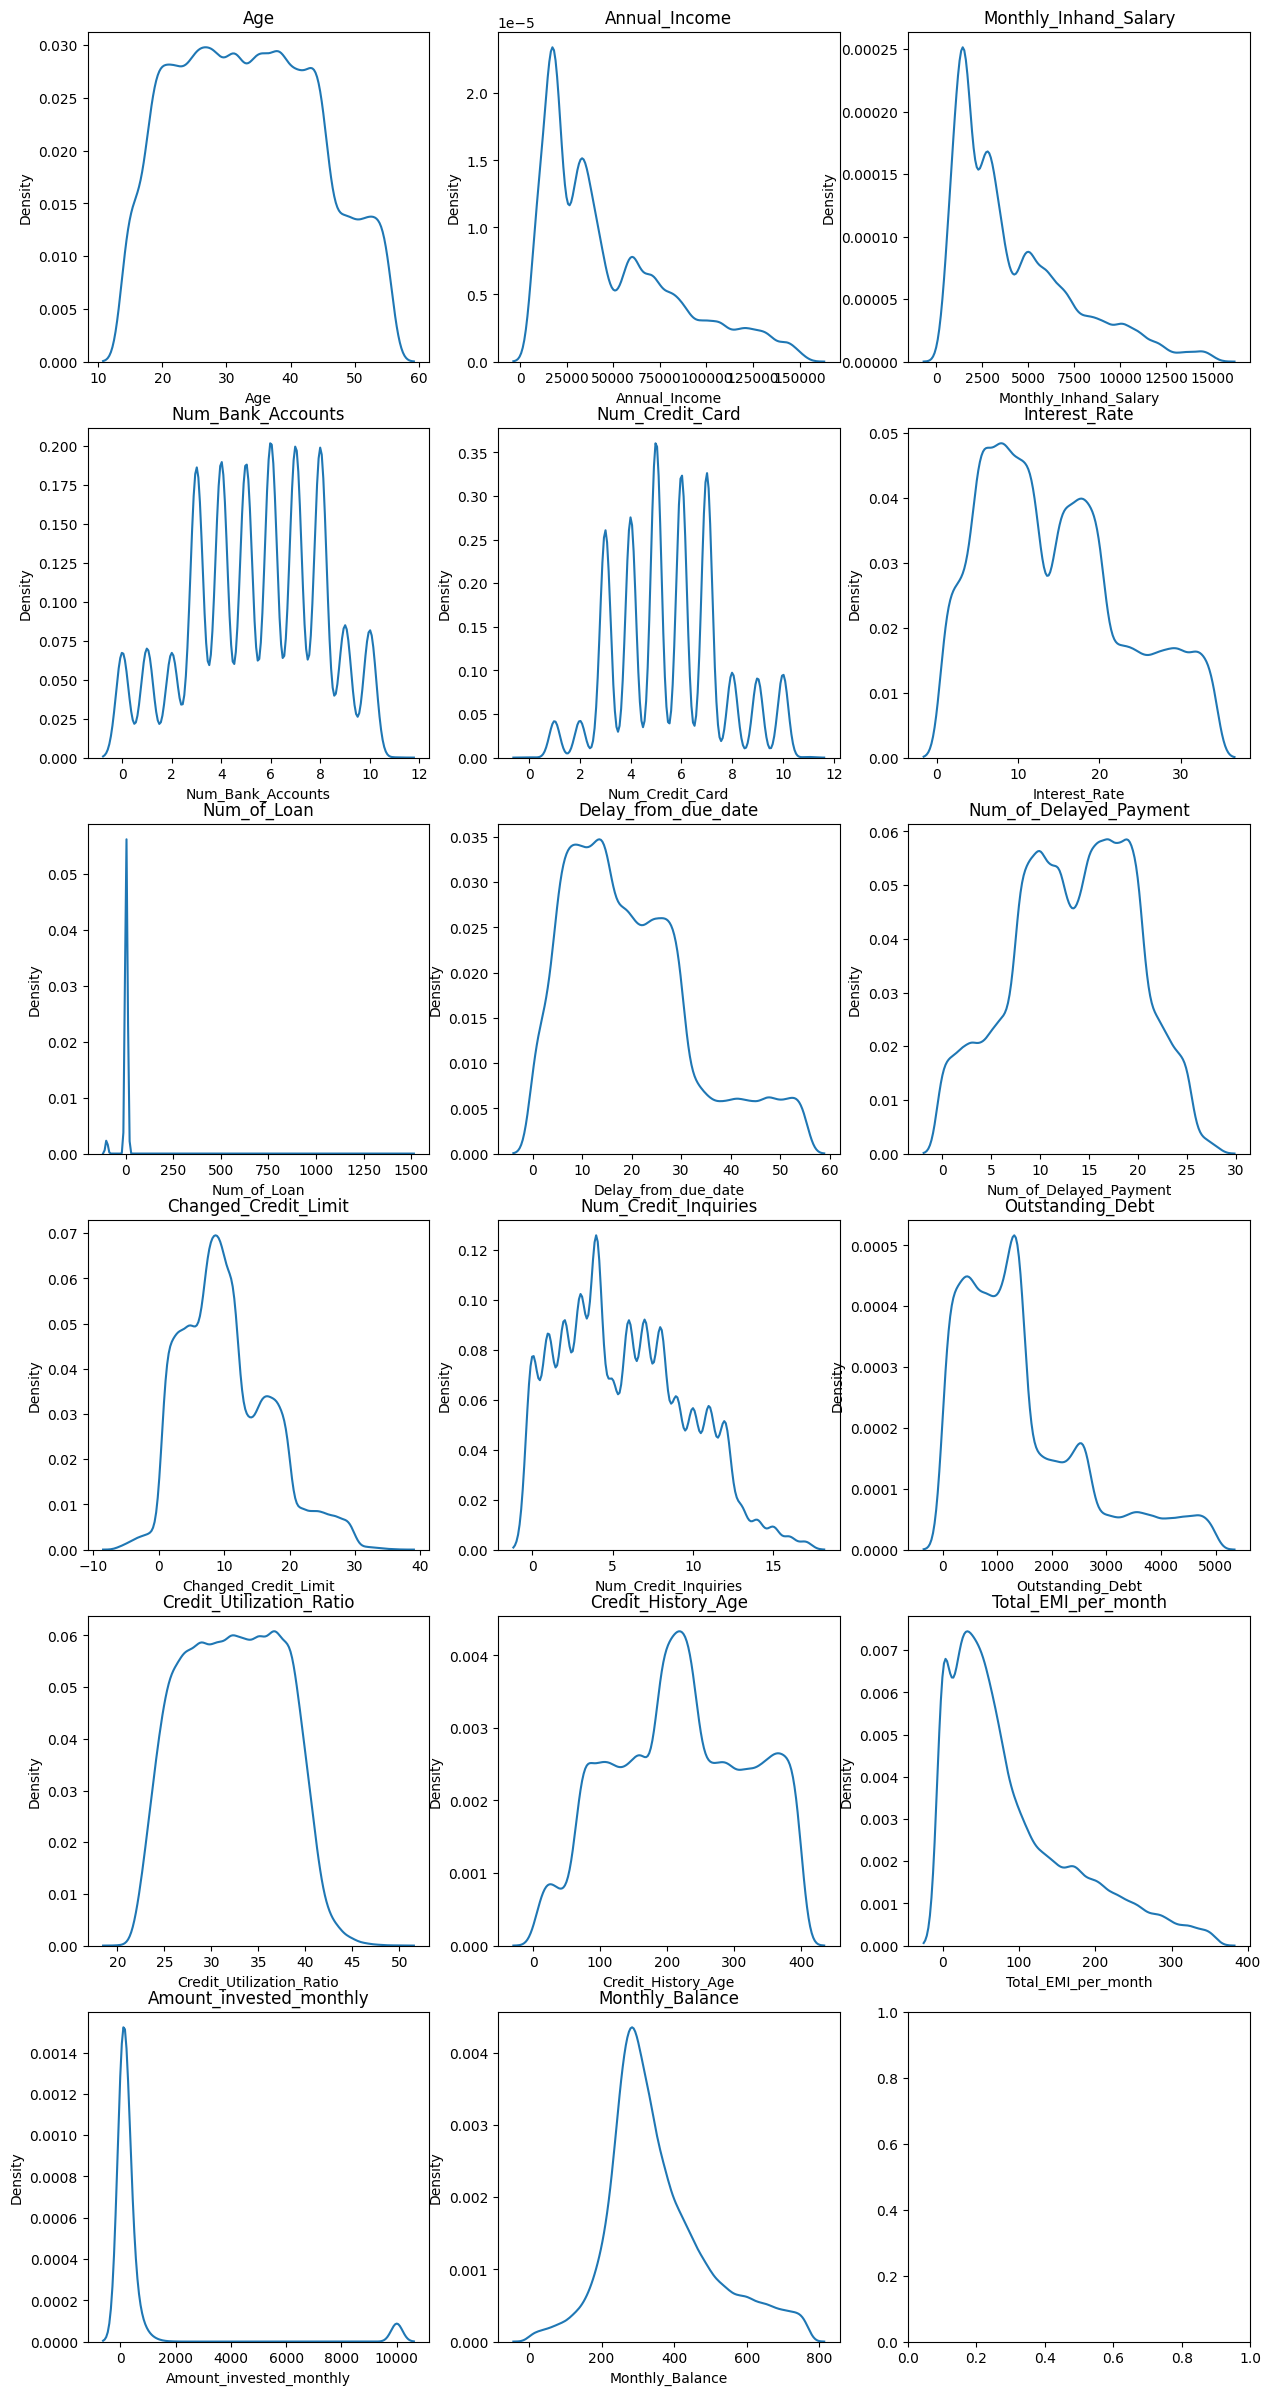

In [149]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
for i, col in enumerate(df.select_dtypes(exclude='O').columns):
    ax[i//3][i%3].set_title(col)
    sns.kdeplot(df, x=col, ax=ax[i//3][i%3])

In [150]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(', and', ',')
df['Num_of_Loan'] = df['Type_of_Loan'].map(lambda x: len(x.split(', ')) if not pd.isnull(x) else 0)
loans_set = list(set([y for x in df['Type_of_Loan'].dropna() for y in x.split(', ')]))
for item in loans_set:
    df[item] = df['Type_of_Loan'].map(lambda x: x.count(item) if not pd.isnull(x) else 0)
df.drop("Type_of_Loan", axis=1, inplace=True)

In [152]:
def fillNan(row, col):
    if pd.isnull(row[col]):
        cols = df[df["Customer_ID"] == row["Customer_ID"]][col].mode()
        try:
            return cols[0]
        except:
            return np.NaN
    return row[col]
for col in df.columns[df.isna().any()]:
    df[col] = df.apply(lambda row: fillNan(row, col), axis=1)
df.dropna(inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93312 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               93312 non-null  object 
 1   Age                       93312 non-null  float64
 2   Occupation                93312 non-null  object 
 3   Annual_Income             93312 non-null  float64
 4   Monthly_Inhand_Salary     93312 non-null  float64
 5   Num_Bank_Accounts         93312 non-null  float64
 6   Num_Credit_Card           93312 non-null  float64
 7   Interest_Rate             93312 non-null  float64
 8   Num_of_Loan               93312 non-null  int64  
 9   Delay_from_due_date       93312 non-null  float64
 10  Num_of_Delayed_Payment    93312 non-null  float64
 11  Changed_Credit_Limit      93312 non-null  float64
 12  Num_Credit_Inquiries      93312 non-null  float64
 13  Credit_Mix                93312 non-null  object 
 14  Outsta

In [154]:
df.select_dtypes('O').columns

Index(['Customer_ID', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [155]:
occupations = list(df.Occupation.astype('category').cat.categories)
occupations.remove('Unknown')
occupations.append('Unknown')
df['Occupation'] = df.Occupation.apply(lambda x: occupations.index(x))

payment_min_amounts = list(df.Payment_of_Min_Amount.astype('category').cat.categories)
payment_min_amounts.remove('Unknown')
payment_min_amounts.append('Unknown')
df['Payment_of_Min_Amount'] = df.Payment_of_Min_Amount.apply(lambda x: payment_min_amounts.index(x))

payment_behaviours = list(df.Payment_Behaviour.astype('category').cat.categories)
payment_behaviours.remove('Unknown')
payment_behaviours.append('Unknown')
df['Payment_Behaviour'] = df.Payment_Behaviour.apply(lambda x: payment_behaviours.index(x))

In [156]:
credit_mixs = ['Bad', 'Standard', 'Good', 'Unknown']
df['Credit_Mix'] = df.Credit_Mix.apply(lambda x: credit_mixs.index(x))

credit_scores = ['Poor', 'Standard', 'Good']
df['Credit_Score'] = df.Credit_Score.apply(lambda x: credit_scores.index(x))

In [158]:
df.drop("Customer_ID", axis=1, inplace=True)

In [159]:
df.to_csv('dataset.csv', index=False)

In [160]:
temp = dict()
temp['occupations'] = occupations
temp['payment_min_amounts'] = payment_min_amounts
temp['payment_behaviours'] = payment_behaviours
temp['credit_mixs'] = credit_mixs
temp['credit_scores'] = credit_scores
temp['loans'] = loans_set
with open('categories.json', 'w', encoding='utf-8') as file:
    json.dump(temp, file, indent=4)